## **Classification of Supervised Learning.**

#### Supervised learning problems are categorized into **"regression"** and **"classification"** problems. In a regression problem, we are trying to **predict results within a continuous output**, meaning that we are trying to map input variables to some continuous function. In a classification problem, we are instead trying to **predict results in a discrete output**. In other words, we are trying to map input variables into discrete categories. 

### **Linear Regression**

#### **linear regression** attempts to represent the **relationship between one or more independent variables** (points on X axis) and a **numeric outcome or dependent variable** (value on Y axis) by fitting the equation of a line to the data

## ```Y = a * X + B```

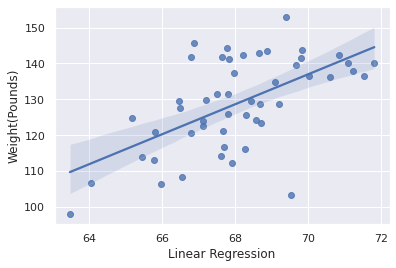

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots appear in the notebook
%matplotlib inline
sns.set_theme(style="darkgrid")

# getting the data
data = pd.read_csv('datasets/SOCR-HeightWeight.csv', nrows=50)

# Creating figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.regplot(x='Height(Inches)', y='Weight(Pounds)', data=data)
ax.set_xlabel('Linear Regression')

plt.show()

#### This algorithm assumes a strong linear relationship between input and output variables as we would assume that if height increases then weight also increases proportionally in a linear way.

![e](imageNotes/e.png)  ![g](imageNotes/g.png)

#### When we are dealing with only one independent variable, like in the example above, we call it **Simple Linear Regression**. When there are more than one independent variables, (e.g., we want to predict weight using more variables than just the person’s height) then this type of regression is termed as **Multiple Linear Regression**. As shown in the figure below, while finding the line of best fit, we can use a polynomial, or a curved line instead of a straight line; this is called **Polynomial Regression.**

![f](imageNotes/f.png)

#### In linear regression, the observations (red) are assumed to be the result of random deviations (green) from an underlying relationship (blue) between a dependent variable (y) and an independent variable (x). While finding the line of best fit, the goal is to minimize the the distance shown in green -- red points as close as possible to the blue line.

In [2]:
# Reading the Data
sales_df = pd.read_csv('datasets/advertising_and_sales_clean.csv')
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [4]:
sales_df.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


In [5]:
sales_df['influencer'].value_counts()

Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: influencer, dtype: int64

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# Create X from the radio column's values
X = np.array(sales_df['radio'])
# print(X.shape)

# Create y from the sales column's values
y = np.array(sales_df['sales'])

# Reshape X
X = X.reshape(-1, 1)
# print(X.shape)

# # Check the shape of the features and targets
print(X.shape, y.shape)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



(4546, 1) (4546,)


In [7]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)


# Make predictions
y_predictions = reg.predict(X_test)

print(y_predictions[:5])

[ 69614.40196636 104976.82354797 210026.94431821 208020.56460541
 304332.7140194 ]


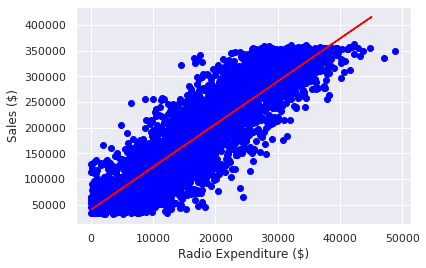

In [8]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X_train, y_train, color="blue")

# Create line plot
plt.plot(X_test, y_predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## Simple Validation

In [9]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_predictions, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.7609020445216754
RMSE: 45879.42086239429


## Cross Validation

In [10]:
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)
cv_results = cv_scores 

# Print scores
print(cv_scores)

# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

[0.74470218 0.7724344  0.76841901 0.74186012 0.75174985 0.7444348 ]
0.7539333927705617
0.012097455447896869
[0.74218195 0.77193247]


## Regularized regression: Ridge

In [11]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.7609020445216718, 0.7609020445216387, 0.7609020445213077, 0.7609020445179987, 0.7609020444849083, 0.7609020441540031]


>### Lasso regression for feature importance

#### Lasso regression can be used to identify important features in a dataset.

[8.34253519]


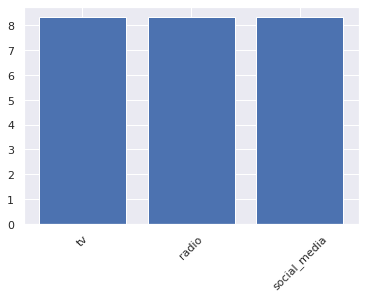

In [12]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X_train, y_train)

sales_columns = ['tv', 'radio', 'social_media']

# Compute and print the coefficients
lasso_coef = lasso.fit(X_train, y_train).coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

## Hyperparameter Tuning

#### The process of **choosing optimal parameter is called Hyperparameter Tuning**.

In [13]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Spliting data
# X_train, X_test, y_train, y_test = 

# Encodering 
ohe = OneHotEncoder(sparse=False) # If we don't set (sparse=False). Then It will through an erron
                                  # ValueError: all the input arrays must have same number of dimensions,
                                  # but the array at index 0 has 2 dimension(s) 
                                  # and the array at index 3 has 0 dimension(s)
            
            
                                  # Because by Default OneHotEncoder returns a sparse Matrix
influencer = np.array(sales_df['influencer'].values)
influencer = influencer.reshape(-1, 1)
influencer= ohe.fit_transform(influencer)
# print(influencer.shape)



tv = np.array(sales_df['tv'].values)
tv = tv.reshape(-1, 1)
# print(tv.shape)

radio = np.array(sales_df['radio'].values)
radio = radio.reshape(-1, 1)
# print(radio.shape)

social_media = np.array(sales_df['social_media'].values)
social_media = social_media.reshape(-1, 1)
# print(social_media.shape)

# Scaleing
scaler = StandardScaler()

scaled_tv = scaler.fit_transform(tv)

scaled_radio = scaler.fit_transform(radio)

scaled_social = scaler.fit_transform(social_media)



# concatenate
sales = np.concatenate((scaled_tv, scaled_radio, scaled_social, influencer),axis=1)
print(sales.shape)



# Pipeline




# # Create X and y arrays
# X = sales.drop("sales", axis=1).values
# y = sales["sales"].values


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Instantiate the model
# reg = LinearRegression()

# # Fit the model to the data
# reg.fit(X_train, y_train)

# # Make predictions
# y_pred = reg.predict(X_test)
# print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

(4546, 7)


### **Logistic Regression**

#### Logistic regression has the same main idea as linear regression. The difference is that this technique is used when the **output or dependent variable is binary** meaning the **outcome can have only two possible values.** For example, let’s say that we want to **predict if age influences the probability of having a heart attack**. In this case, our prediction is only a **“yes” or “no”,** only two possible values.

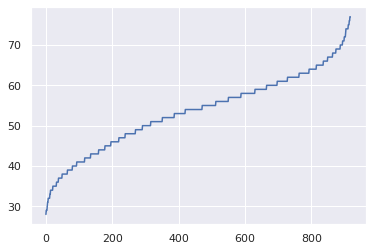

In [14]:
# Getting the data
data = pd.read_csv('datasets/heart.csv')

# Setting figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Ploting the data
plt.plot(sorted(data['Age']))
plt.show()

#### In logistic regression, the line of best fit is not a straight line anymore. The prediction for the final output is transformed using a **non-linear S-shaped function called the logistic function, g().**

### **Decision Trees**

#### Decision Trees also belong to the category of **supervised learning algorithms**, but they can be used for solving both **regression and classification** tasks.

#### In this algorithm, the training model learns to predict values of the target variable by learning decision rules with a tree representation. 

#### A tree is made up of **nodes corresponding to a feature or attribute**. At each node we ask a question about the data based on the available features, e.g., **Is it raining or not raining?**. **The left and right branches represent the possible answers. The final nodes, leaf nodes, correspond to a class label/predicted value**. The importance for each feature is determined in a top-down approach — the higher the node, the more important its attribute/feature. 

#### Say we want to predict whether or not we should wait for a table at a restaurant. 

![h](imageNotes/h.png)

### In this example, our attributes are:

1. **Alternate:** alternative restaurant nearby
2. **Bar:** bar area to wait
3. **Fri/Sat:** true on Fridays and Saturdays
4. **Hungry:** whether we are hungry
5. **Patrons:** how many people in restaurant (none, some, or full)
6. **Raining:** raining outside
7. **Wait-Estimate:** estimated waiting time (<10,10-30,30-60,>60)

#### Our data instances are then classified into **“wait” or “leave”** based on the attributes listed above. From the visual representation of the decision tree, we can see that **“wait-estimate”** is **more important** than **“raining”** because it is present at a relatively higher node in the tree.

### **Naive Bayes**

#### Naive Bayes classifiers are actually a popular statistical technique of **spam e-mail filtering.** 
#### It works by correlating the use of tokens typically words, with spam and non-spam e-mails and then using Bayes’ theorem to calculate a probability that an email is spam or not.

#### **Conditional Probability**

#### **P(A|B)** Event **A** will occur if given that event **B** has already occurred.
#### **In other word How much A in B divided by B**
#### Say we have a training data set with weather **conditions ,x** , and the corresponding target variable **“Played”, c**. We can use this to obtain the probability of **“Players will play if it is rainy”, P(c|x)**. 

#### **Bayes' Theorem**

![n](imageNotes/n.png)

#### It is called naive because the **classifier assumes that the input variables are independent of each other**, quite a strong and unrealistic assumption for real data!

#### To put it simply, the model is composed of two types of probabilities:
1. The probability of each class;
2. The conditional probability for each class given each value of x


#### Say we have a training data set with weather **conditions ,x** , and the corresponding target variable **“Played”, c**. We can use this to obtain the probability of **“Players will play if it is rainy”, P(c|x)**. 
#### Note that even if the answer is a numerical value ranging from 0 to 1, this is an example of a classification problem — we can use the probabilities to reach a “yes/no” outcome.

## **Support Vector Machine (SVM)**

#### Support Vector Machines is a supervised algorithm used mainly for classification problems.
#### In this algorithm, we plot each data item as a point in n-dimensional space, where n is the number of input features. **For example, with two input variables, we would have a two-dimensional space. Based on these transformations, SVM finds an optimal boundary, called a hyperplane, that best separates the possible outputs by their class label**. In a two-dimensional space, **this hyperplane can be visualized as a line although not necessarily a straight line.** The task of the SVM algorithm is to find the coefficients that provide the best separation of classes by this hyperplane.

![j](imageNotes/j.png)


#### The **distance between the hyperplane and the closest class point is called the margin.** The **optimal hyperplane is one that has the largest margin** that classifies points in such a way that the **distance between the closest data point from both classes is maximum.**

## **K-Nearest Neighbors (KNN)**

#### It is based on the following idea from real life: **You are the average of the five people you most associate with!**

#### **KNN** **classifies an object by searching through the entire training set for the k most similar instances, the k neighbors, and assigning a common output variable to all those k instances.**

![k](imageNotes/k.png)

#### The figure represents a classification example. The test sample (**green dot**) should be classified either to **blue squares** or to red triangles. If k = 3 (solid line circle) it is assigned to the **red triangles** because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle):

In [ ]:
# Reading the data
chunk_df = pd.read_csv('datasets/telecom_churn_clean.csv')
chunk_df.info()

In [ ]:
chunk_df.describe()

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = chunk_df.drop("churn", axis=1).values
y = chunk_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

In [ ]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
print('n_neighbors: ', neighbors, '\n')
print('train_accuracies: ', train_accuracies, '\n')
print('test_accuracies: ', test_accuracies)

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## **K-Means**

#### **K-means** is a type of unsupervised algorithm for data clustering. It follows a simple procedure to classify a given data set.
#### It tries to **find K number of clusters or groups** in the dataset. Since we are dealing with **unsupervised learning**, all we have is our training data X and the number of clusters, K, that we want to identify, but no labelled training instances. 

#### For example, K-Means could be used to segment users into K groups based on their ***purchase history.***

![z](imageNotes/z.png)

#### The algorithm **interactively assigns each data point to one of the K groups based on their features.**
#### Initially, **it picks k points for each of the K-clusters, known as the centroid.**
### **Centroid** can be calculated by find the  **Mean of the closest individuals group**
#### A new data point is **put into the cluster having the closest centroid** based on feature similarity. As new elements are added to the cluster, the **cluster centroid is re-computed** and **keeps changing**. The new centroid becomes the average location of all the data points currently in the cluster. This process is continued iteratively until the centroids stop changing. At the end, each centroid is a collection of feature values that define the resulting group.



#### Continuing with the purchase history example, the **red cluster** might represent users that like to buy **tech gadgets** and the **blue** one might be users interested in buying **sports equipment**.
#### Now the algorithm will keep moving the centroid for each user-segment until it is able to create K groups. And it will do so by trying to maximize the separation between groups and users outside of the group.

## **Random Forest**

#### Random Forest is one of the most popular and powerful machine learning algorithms.
>### **Ensemble Algorithm**
#### The underline of **Ensemble Technique combining multiple models.**

#### The underlying idea for **ensemble learning** the is **wisdom of crowds**, the idea that the **collective opinion of many is more likely to be accurate than that of one.**
#### In Ensemble Technique There are **Two** Technique:
#### **i. Bagging**
#### **ii. Boosting**

>### **Bagging**(Bootstrap Aggregation)
#### **Random Forest** is one of the Technique of **Bagging**.

#### In **Random Forest**, we have an ensemble of **Decision trees.** 
#### The outcome of each of the models is combined and a prediction is made.

#### When we want to classify a new object, **we take the vote of each decision tree and combine the outcome to make a final decision; majority vote wins.**

![x](imageNotes/x.png)

>### **Bootstrap Sampling**
#### **Bootstrap sampling is a random sampling technique with replacement steps.**
#### **1. Randomly select an observation from the original Dataset.**
#### **2. Write it down**
#### **3. And put it *back***
#### **Now repeat Steps 1, 2, 3 for N number of time(Here N is the number of observation in the original sample)**

>### **Bootstrapping**
#### **Bootstrapping** consists of **4 Steps**.
#### **1. Make Bootstrap Sampling Dataset.**
#### **2. Calculate Something( It may be Mean or Median or Mode)**
#### **Keep track of the calculation(End up Making a histogram or some like frequency Table or Like that)**
#### **Repeat Steps 1, 2 and 3 a bunch of time**

## **Dimensionality Reduction**

#### In the last years, there has been an exponential increase in the amount of data captured. This means that many machine learning problems involve thousands or even millions of features for each training instance! **This not only makes training extremely slow but makes finding a good solution much harder.** This problem is often referred to as the curse of **dimensionality.** 

#### **Dimensionality Reduction** is about assembling specific features into more high-level ones without losing the most important information.

>#### **Principal Component Analysis (PCA)** is the most popular dimensionality reduction technique. Geometrically speaking, PCA reduces the dimension of a dataset by **squashing it onto a lower-dimensional line, or more generally a hyperplane/subspace,** which retains as much of the original data’s salient characteristics as possible.

># **Artificial Neural Networks**

#### As a neural network is a essentially **a set of interconnected layers with weighted edges and nodes called neurons.** Between the input and output layers we can **insert multiple hidden layers.** 

![neurons](imageNotes/nurons.png)

#### **A set of neurons are mapped out and assigned a random weight which determines how the neurons process new data, images, text, sounds,** etc. The correct relationship between inputs and outputs is learned from training the neural network on input data. Since during the training phase the system gets to see the correct answers, if the network doesn’t accurately identify the input – doesn’t see a face in an image, for example — then the system adjusts the weights. Eventually, after sufficient training, the neural network will consistently recognize the correct patterns in speech, text or images.

| Human Neuron | Artificial Neuron |
| -------------------------- | ------------------------- |
| ![l](imageNotes/l.png) | ![m](imageNotes/m.png) |

## **Latent Dirichlet Allocation(LDA)**

#### Latent Dirichlet Allocation or LDA is an algorithm that is used in **topic modelling.** 
>### Topic Modelling 
>#### Topic modeling is an unsupervised machine learning approach that can scan a series of documents, find word and phrase patterns within them, and automatically cluster word groupings and related expressions that best represent the set. 